In [2]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

 using following algos

KNN clasifier,
random forest clasifier,
decision tree clasifier

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()
#here we can see the statistics 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Now using feature selection

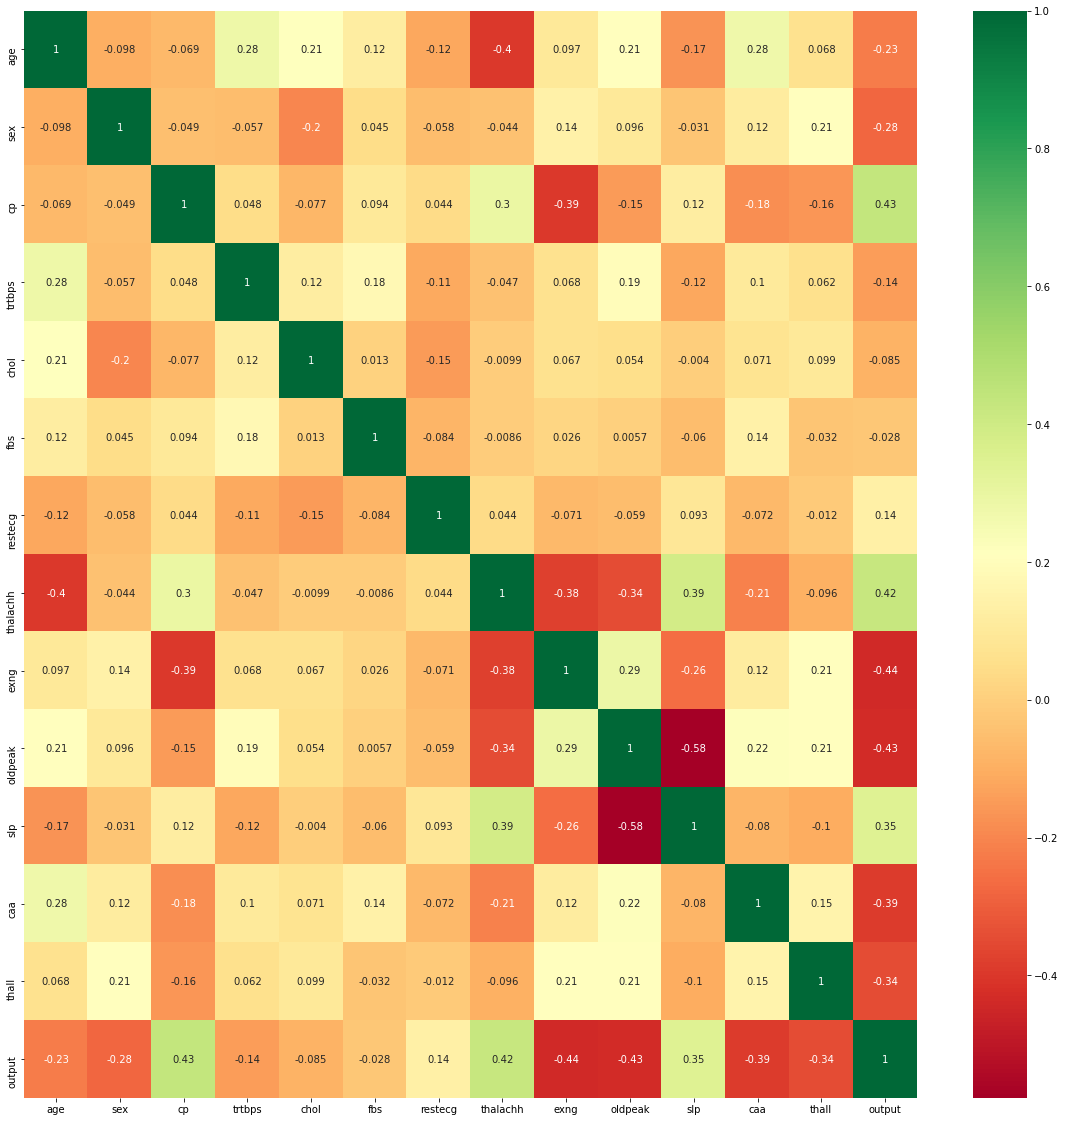

In [6]:
import seaborn as sns
#now to find correlation among the features
correlation = df.corr()
corr_features = correlation.index
plt.figure(figsize = (20,20))
# plot heap map 
correlation_heatmap = sns.heatmap(df[corr_features].corr(), annot = True, cmap = "RdYlGn") 

In [7]:
#here we can see there isn't any zero value which means there
# is no such feature with no correlation and -ve indicating 
# that one is drecreasing due to other feature

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

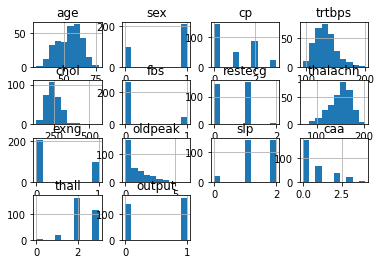

In [8]:
df.hist()

<AxesSubplot:xlabel='output', ylabel='count'>

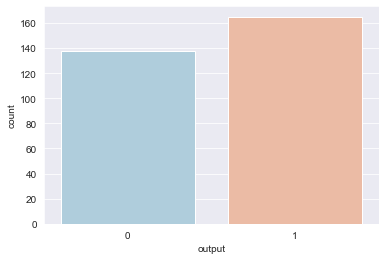

In [9]:
#darkgrid, whitegrid, dark, white, ticks
# sns.set_style('whitegrid')
sns.set_style('darkgrid')
sns.countplot(x = 'output', data = df,palette = 'RdBu_r')

data processing

In [11]:
dataset = pd.get_dummies(df,columns =[ 'sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale  = ['age', 'trtbps', 'chol', 'thalachh','oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale]) 

In [17]:
dataset.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [19]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


from here we will use algorithms

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
y = dataset['output']
X = dataset.drop(['output'], axis = 1)

In [31]:
# using knn classifier
from sklearn.model_selection import cross_val_score
knn_scores= []

for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier , X,y,cv = 10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'kNeighborsClassifier score for different values of k ')

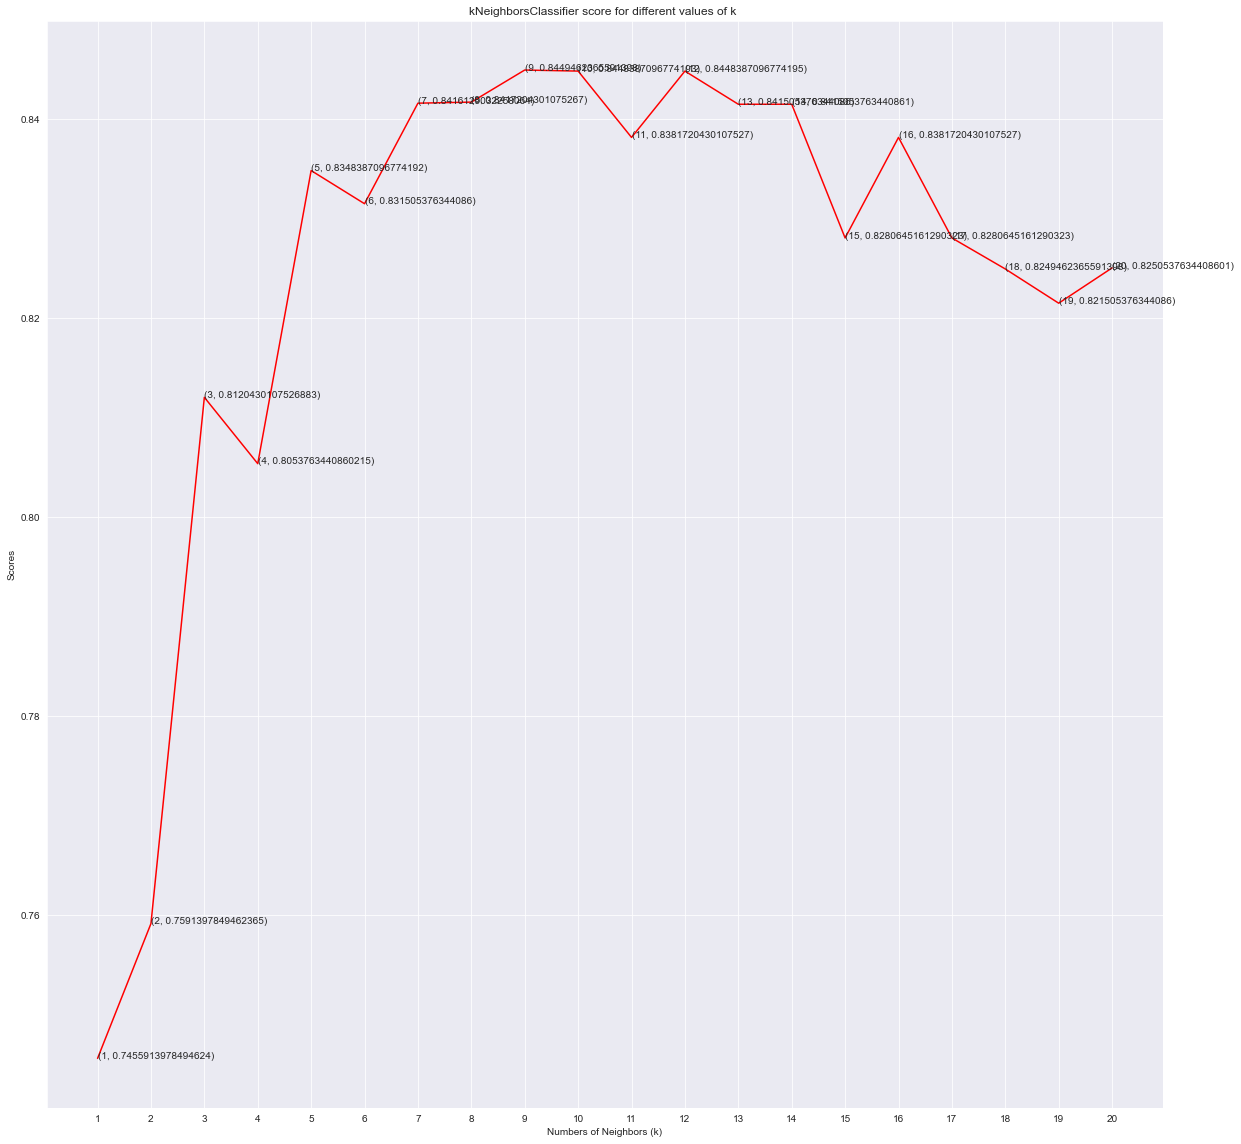

In [40]:
# plot 
plt.figure(figsize = (20,20))
plt.plot([k for k in range(1,21)], knn_scores, color = 'red')

for i  in range(1,21):
    plt.text(i,knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range (1,21)])
plt.xlabel('Numbers of Neighbors (k)')
plt.ylabel('Scores')
plt.title('kNeighborsClassifier score for different values of k ')

In [41]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8448387096774195

# Random Forest

In [46]:
# print('RandomForestClassifier')
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
# model.fit(X_train, y_train)
# Y_pred = model.predict(X_test)
# score = model.score(X_train, y_train)
# print('Training Score:', score)
# score = model.score(X_test, y_test)
# print('Testing Score:', score)
# output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
# print(output.head())
# people = output.loc[output.Predicted == 1]["Predicted"]
# rate_people = 0
# if len(people) > 0 :
#     rate_people = len(people)/len(output)
# print("% of people predicted with heart-disease:", rate_people)
# score_rfc = score
# out_rfc = output
# from sklearn.metrics import classification_report
# print(classification_report(y_test,Y_pred))

In [45]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.8316129032258065